# CD4 Cropseq 1D Analysis

- Hyperparameter check
- Select genes to check correlation against
- Save the preprocessed AnnData object

In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pybedtools import BedTool
import pickle as pkl
%matplotlib inline
import itertools

import statsmodels.formula.api as smf
import statsmodels.api as sm
pd.set_option('display.max_rows', 600)

In [2]:
import functools

In [3]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.9-py3.8.egg')
sys.path.append('/home/ssm-user/Github/misc-seq/miscseq')
import encode
import memento

In [4]:
data_path = '/data_volume/memento/tfko140/'
# fig_path = '/data/home/Github/scrna-parameter-estimation/figures/fig6/'

In [10]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'5',
         'ytick.labelsize':'5'}
pylab.rcParams.update(params)

In [11]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### Read the AnnData object

In [12]:
adata = sc.read(data_path + 'tfko.sng.guides.full.ct.h5ad')

Only considering the two last: ['.ct', '.h5ad'].
Only considering the two last: ['.ct', '.h5ad'].


In [13]:
adata

AnnData object with n_obs × n_vars = 173018 × 14988
    obs: 'concat_index', 'donor', 'multiplet', 'well', 'guide1_cov', 'guide2_cov', 'guide3_cov', 'guide4_cov', 'guide1_ce_cov', 'guide2_ce_cov', 'guide3_ce_cov', 'guide4_ce_cov', 'guide_multiplet_cov', 'percent_mito', 'percent_ribo', 'percent_hist', 'numi', 'n_genes', 'ct', 'leiden', 'annotation', 'WT'
    var: 'gene_ids-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0', 'gene_ids-1-0-0-0-0', 'gene_ids-1-0-0-0', 'gene_ids-1-0-0', 'gene_ids-1-0', 'gene_ids-1', 'n_cells'

In [22]:
adata['GATCGTATCCAGAAGG-3', :]

View of AnnData object with n_obs × n_vars = 1 × 14988
    obs: 'concat_index', 'donor', 'multiplet', 'well', 'guide1_cov', 'guide2_cov', 'guide3_cov', 'guide4_cov', 'guide1_ce_cov', 'guide2_ce_cov', 'guide3_ce_cov', 'guide4_ce_cov', 'guide_multiplet_cov', 'percent_mito', 'percent_ribo', 'percent_hist', 'numi', 'n_genes', 'ct', 'leiden', 'annotation', 'WT'
    var: 'gene_ids-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0-0', 'gene_ids-1-0-0-0-0-0', 'gene_ids-1-0-0-0-0', 'gene_ids-1-0-0-0', 'gene_ids-1-0-0', 'gene_ids-1-0', 'gene_ids-1', 'n_cells'

In [24]:
adata.obs['guide1_cov'].value_counts()

YEATS4.69370716.CAGCTTTAGCAAATGATACA      2687
FUBP1.77964146.ATGATGGGACAACACCCGAA       2122
IFI16.159045333.CCAAAATGAATGACTTCATG      2075
ZNF706.101201657.GAAACAAGGACATGACCAAA     2055
RFX2.6026185.GGAATCACATCACACAAAAG         1821
VDR.47855738.ACAGCTCTAGGGTCACAGAA         1792
FUBP1.77969992.CAAAAATTGGAGGTGATGCA       1667
SMAD2.47896526.CTAAATGTGTTACCATACCA       1459
ELK1.47638134.GAAATCGGAAGAGCTTAATG        1426
GABPA.25741671.AAGCAGAGTGCACAGAAGAA       1407
HOPX.56655937.CCTGGAGTACAACTTCAACA        1379
EZH2.148826587.ATGTTGGGGGTACATTCAGG       1350
ZNF146.36236488.CACATACCTTACAGGCAAAG      1342
SLC30A9.42063117.AAAGAGGATTACCCATAGAA     1322
GTF2H2.71049089.ATTAGATCATAAATATTAGA      1321
FUS.31184329.CAAAGCTATAATCCCCCTCA         1302
FLI1.128772911.ACTGTGTAAAATGAACAAGG       1287
HMGB1.30463536.GAAGTGCTCAGAGAGGTGGA       1274
SUB1.32591681.CAGAGATGATAACATGTTTC        1263
ZNF511.133310225.CAGAGACCGGAAGGATCACA     1233
HDAC3.141634859.GTCAGCCCCACCAATATGCA      1227
TFDP1.1136339

In [20]:
adata[:, 'STAT1'].X.todense()

matrix([[0.],
        [1.],
        [4.],
        ...,
        [0.],
        [2.],
        [0.]], dtype=float32)

In [16]:
adata.X[:10, :10].todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
adata.obs['guide1_cov'] = adata.obs['guide1_cov'].str.split('.').str[:-1].str.join('.')

In [9]:
adata.shape

(173018, 14988)

### Pick out guides to test

In [14]:
counts = adata[adata.obs.WT == 'F'].obs.guide1_cov.value_counts()
filtered_guides = counts[counts > 200].index.tolist()

In [15]:
wt_guides = adata[adata.obs.WT == 'T'].obs.guide1_cov.drop_duplicates().tolist()

In [16]:
filtered_guides = list(set(filtered_guides) - set(wt_guides))

In [17]:
len(filtered_guides)

251

### Setup memento

In [18]:
adata.obs['q'] = 0.11

In [19]:
memento.setup_memento(adata, q_column='q', trim_percent=0.1, shrinkage=0.0)

### Normalize by well

In [20]:
# idxs = adata.obs.index
# adata.obs = adata.obs.merge(adata.obs.groupby('well').memento_size_factor.mean().reset_index(name='well_avg'), on='well')
# adata.obs.index = idxs
# adata.obs['memento_size_factor'] = adata.obs['memento_size_factor']/adata.obs['well_avg']

In [21]:
adata.obs['well'] = 'well' + adata.obs['well'].astype(str)

### Run memento

In [22]:
memento.create_groups(adata, label_columns=['guide1_cov', 'donor'])

In [17]:
memento.compute_1d_moments(adata, min_perc_group=.7)

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [18]:
meta_df = memento.get_groups(adata)
meta_df = pd.get_dummies(meta_df, prefix='', prefix_sep='', drop_first=False)

In [28]:
treatment = meta_df[filtered_guides]
covariate = meta_df.iloc[:, -9:]

In [ ]:
memento.ht_1d_moments(
        adata, 
        covariate=covariate,
        treatment=treatment, 
        num_boot=5000, 
        verbose=1,
        num_cpus=90,
        resampling='bootstrap',
        resample_rep=False,
        approx=True)

In [32]:
res =  memento.get_1d_ht_result(adata)

In [ ]:
res.to_csv(data_path + '1d/raw_1d_result.csv', index=False)

In [34]:
res.head(5)

gene               tx   de_coef     de_se   de_pval  dv_coef  \
0  NOC2L   HMGA1.34240847 -0.014996  0.017793  0.401618      0.0   
1  NOC2L   PCBP2.53459399 -0.002645  0.017917  0.883358      0.0   
2  NOC2L  ZNF593.26170086  0.016818  0.018119  0.355868      0.0   
3  NOC2L     PHB.49411797  0.020980  0.014477  0.148349      0.0   
4  NOC2L   IRF2.184418577  0.012913  0.014754  0.381695      0.0   

          dv_se  dv_pval  
0  2.890934e-16      1.0  
1  2.788594e-16      1.0  
2  2.780317e-16      1.0  
3  2.239216e-16      1.0  
4  2.330867e-16      1.0

### FDR correction by perturbation

In [5]:
res = pd.read_csv(data_path + '1d/raw_1d_result.csv')

In [32]:
filtered_res = res.copy()

In [33]:
filtered_res['de_fdr'] = filtered_res.groupby('tx')['de_pval'].transform(lambda x: memento.util._fdrcorrect(x))

In [34]:
filtered_res.query('gene == "ISG15"  & tx.str.contains("IRF")', engine='python')

gene              tx   de_coef     de_se       de_pval  dv_coef  \
149  ISG15  IRF2.184418577  0.298614  0.030894  4.826180e-22      0.0   
153  ISG15   IRF8.85909118  0.001990  0.026342  9.399620e-01      0.0   
211  ISG15     IRF4.394977  0.005321  0.026288  8.396206e-01      0.0   
234  ISG15  IRF1.132487119 -0.061488  0.033008  6.758018e-02      0.0   
235  ISG15  IRF1.132487047 -0.050180  0.029978  9.493599e-02      0.0   
256  ISG15   IRF8.85913149  0.023695  0.026488  3.730669e-01      0.0   

            dv_se  dv_pval        de_fdr  
149  2.976353e-16      1.0  2.360967e-19  
153  1.406718e-16      1.0  9.972105e-01  
211  1.084101e-16      1.0  9.811673e-01  
234  1.764269e-16      1.0  4.912366e-01  
235  1.483538e-16      1.0  6.135097e-01  
256  1.342102e-16      1.0  9.036794e-01

In [35]:
filtered_res.query('de_fdr < 0.1').shape

(7641, 9)

In [36]:
filtered_res.to_csv(data_path + '1d/filtered_1d_result.csv', index=False)

### Guide heatmap

In [37]:
target_genes = [x.split('.')[0] for x in filtered_guides]

In [38]:
len(target_genes)

145

In [39]:
res = pd.read_csv(data_path + '1d/raw_1d_result.csv')

In [40]:
res.head(5)

gene               tx   de_coef     de_se   de_pval  dv_coef  \
0  NOC2L   HMGA1.34240847 -0.014996  0.017793  0.401618      0.0   
1  NOC2L   PCBP2.53459399 -0.002645  0.017917  0.883358      0.0   
2  NOC2L  ZNF593.26170086  0.016818  0.018119  0.355868      0.0   
3  NOC2L     PHB.49411797  0.020980  0.014477  0.148349      0.0   
4  NOC2L   IRF2.184418577  0.012913  0.014754  0.381695      0.0   

          dv_se  dv_pval    de_fdr  
0  2.890934e-16      1.0  0.966956  
1  2.788594e-16      1.0  0.997074  
2  2.780317e-16      1.0  0.918063  
3  2.239216e-16      1.0  0.673294  
4  2.330867e-16      1.0  0.826025

In [41]:
avail_target_genes = set(target_genes) & set(res.gene)

In [42]:
len(avail_target_genes)

75

In [43]:
avail_guides = []
for t in avail_target_genes:
    
    for g in filtered_guides:
        if t in g:
            avail_guides.append(g)
            break

In [44]:
heatmap = res.query('gene in @avail_target_genes & tx in @avail_guides').pivot('tx', 'gene', 'de_coef')
# heatmap.
heatmap = (heatmap - heatmap.mean(axis=0))/heatmap.std(axis=0)

In [64]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':1.8,
         'ytick.labelsize':1.8}
pylab.rcParams.update(params)


In [65]:
heatmap.shape

(75, 75)

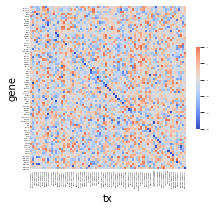

In [66]:
plt.figure(figsize=(3.5,3))
ax = sns.heatmap(heatmap.T, vmax=2, vmin=-3, cmap='coolwarm', center=0,cbar_kws={"shrink": 0.5}, yticklabels=1, xticklabels=1)
# plt.axis('equal')
ax.tick_params(length=0, pad=0)

# plt.ylabel('Guide'); plt.xlabel(None)
plt.savefig('targets.pdf', bbox_inches='tight')



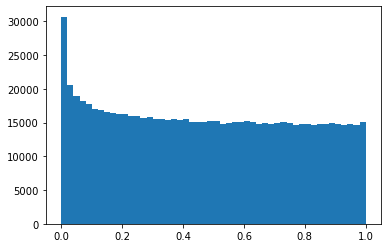

In [49]:
plt.hist(res['de_pval'], bins=50);

In [56]:
y = adata[:, 'ISG15'].X.todense().A1

In [66]:
x1 = (adata.obs['guide1_cov'] == 'IRF1.132487119').astype(int).values
x2 = adata.obs.donor

In [72]:
df = pd.DataFrame({'ISG15':y, 'ko':x1, 'donor':x2})

In [71]:
df

0         1        2         3         4         5         6       \
0      0.0       0.0      1.0       2.0       0.0       1.0       1.0   
1        0         0        0         0         0         0         0   
2  IGTB884  IGTB1982  IGTB884  IGTB1762  IGTB2065  IGTB2065  IGTB1762   

    7         8         9       ...    173008    173009    173010    173011  \
0      3.0       1.0       0.0  ...       0.0       6.0       1.0       4.0   
1        0         0         0  ...         0         0         0         0   
2  IGTB884  IGTB1762  IGTB1372  ...  IGTB1840  IGTB2065  IGTB2065  IGTB1762   

     173012    173013    173014   173015   173016   173017  
0       1.0       2.0       1.0      0.0      0.0      1.0  
1         0         0         0        0        0        0  
2  IGTB1762  IGTB2065  IGTB1840  IGTB884  IGTB884  IGTB884  

[3 rows x 173018 columns]

In [75]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [63]:
sm.GLM(y.reshape(-1,1), x.reshape(-1,1), family=sm.families.NegativeBinomial()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               173018
Model:                            GLM   Df Residuals:                   173017
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.6032e+05
Date:                Sat, 02 Jul 2022   Deviance:                   1.8649e+05
Time:                        15:43:19   Pearson chi2:                 3.18e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0248      0.056      0.446      0.656      -0.084       0.134
==============================================================================
"""

In [52]:
res.query('tx.str.contains("IRF1")', engine='python')

gene              tx   de_coef     de_se   de_pval   dv_coef  \
9            NOC2L  IRF1.132487119  0.053369  0.094642  0.579883 -0.866112   
121          NOC2L  IRF1.132487047 -0.123180  0.100829  0.239891 -0.902190   
154          ISG15  IRF1.132487119 -0.075722  0.073428  0.308751  0.763196   
266          ISG15  IRF1.132487047 -0.107740  0.065996  0.104311  0.738846   
299         UBE2J2  IRF1.132487119  0.079022  0.156090  0.612733  0.384599   
...            ...             ...       ...       ...       ...       ...   
794431      MT-ND6  IRF1.132487047  0.080959  0.043997  0.076120  0.230955   
794464      MT-CYB  IRF1.132487119 -0.032443  0.018858  0.088262 -0.052097   
794576      MT-CYB  IRF1.132487047  0.034811  0.018612  0.065491  0.097081   
794609  AL592183.1  IRF1.132487119 -0.038530  0.073704  0.607965  0.008742   
794721  AL592183.1  IRF1.132487047  0.029388  0.066149  0.657016 -0.212374   

           dv_se   dv_pval  
9       0.831018  0.298665  
121     0.717042  0.226519  
154     0.510455  0.151079  
266     0.333973  0.097456  
299     0.440464  0.393272  
...          ...       ...  
794431  0.211938  0.291183  
794464  0.094043  0.583413  
794576  0.069795  0.167770  
794609  0.361662  0.987054  
794721  0.375651  0.665671  

[10962 rows x 8 columns]

In [ ]:
res.sort_values('de_pval').head(500)

In [ ]:
for g in filtered_guides:
        
    adata_ko = adata.copy()[adata.obs.guide1_cov.isin([g]) | (adata.obs.WT =='T')].copy()
    
#     adata_ko = adata_ko.concatenate(sc.pp.subsample(adata_wt, n_obs=adata_ko.shape[0], copy=True))
#     adata_ko.uns['memento'] = adata.uns['memento'].copy()

    ko_converter={'F':1, 'T':0}
#     adata_ko.obs['ko_indicator'] = adata_ko.obs['WT'].apply(lambda x: ko_converter[x])
    adata_ko.obs['ko_indicator'] = (adata_ko.obs['guide1_cov']==g).astype(int)

    memento.create_groups(adata_ko, label_columns=['ko_indicator', 'well'])
    memento.compute_1d_moments(adata_ko, min_perc_group=.7)
    
    meta_df = memento.get_groups(adata_ko)
    meta_df = pd.get_dummies(meta_df, drop_first=True)
#     for col in meta_df.columns[1:]:
#         meta_df['inter_'+col] = meta_df['ko_indicator']*meta_df['col']
# #     to_drop = None
# #     for col in meta_df.columns:
# #         if g in col:
# #             to_drop = col
# #             break
# #     if to_drop is not None:
# #         meta_df = meta_df.drop(col, axis=1)
    
#     meta_df['intercept'] = 1
    treatment = meta_df[['ko_indicator']]
#     covariate = meta_df[['intercept']]
    covariate = meta_df.iloc[:, 1:]

    memento.ht_1d_moments(
        adata_ko, 
        covariate=covariate,
        treatment=treatment, 
        num_boot=5000, 
        verbose=1,
        num_cpus=90,
        resampling='bootstrap',
        resample_rep=False,
        approx=True)
    res =  memento.get_1d_ht_result(adata_ko)
    print('finished', g, res.de_coef.median())
    
    res.to_csv(data_path + '1d_tests/{}_no_shrink.csv'.format(g), index=False)

### Read DE results

In [125]:
target_genes = [x.split('.')[0] for x in filtered_guides]

In [126]:
avail_target_genes = set(target_genes)
for guide in filtered_guides:
    
    res = pd.read_csv(data_path + '1d_tests/{}_no_shrink.csv'.format(guide), index_col=0)
    avail_target_genes &= set(res.index)

In [127]:
avail_guides = []
for t in avail_target_genes:
    
    for g in filtered_guides:
        if t in g:
            avail_guides.append(g)
            break

In [128]:
len(avail_guides)

53

In [129]:
heatmap = []
for guide in avail_guides:
    
    res = pd.read_csv(data_path + '1d_tests/{}_no_shrink.csv'.format(guide), index_col=0)
    heatmap.append(res.loc[avail_target_genes].de_coef.values)
heatmap = pd.DataFrame(np.vstack(heatmap), index=avail_guides, columns=avail_target_genes)
heatmap = (heatmap - heatmap.mean(axis=0))/heatmap.std(axis=0)

(0.0, 53.0, 53.0, 0.0)

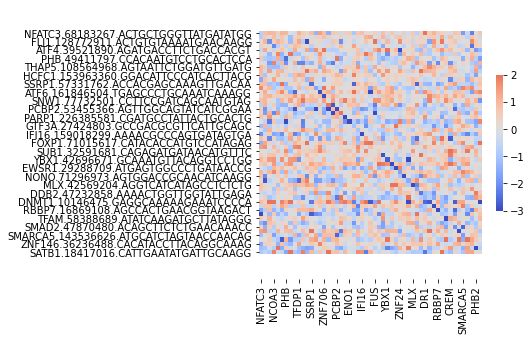

In [138]:
plt.figure(figsize=(5,5))
sns.heatmap(heatmap, vmax=2, vmin=-3, cmap='coolwarm', center=0,cbar_kws={"shrink": 0.5})
plt.axis('equal')
# plt.savefig('targets.png', dpi=300)

In [37]:
significant_guides = []
results = {}
de_coefs = []
for guide in filtered_guides:
    
    res = pd.read_csv(data_path + '1d_tests/{}.csv'.format(guide), index_col=0)
    res['de_fdr'] = memento.util._fdrcorrect(res['de_pval'])
    
    g = guide.split('.')[0]
    if g not in res.index.values:
        continue
    de_coefs.append(res.loc[g].de_coef)
    
    if res.loc[g].shape[0] > 0:
        print(g, res.loc[g].de_coef, res.loc[g].de_fdr)


POLR2A -0.1439936757087707 0.9956023634741674
SMARCA5 -0.2550667524337769 0.2744008441419409
SMAD2 -0.1308043003082275 0.3301695719519233
TAF7 0.006595641374588 0.9995755916401731
SUB1 -0.1110180616378784 0.13930949781581756
ENO1 0.0345532894134521 0.9998948148712488
FUS -0.0384435951709747 0.6658343924336121
ZNF207 -0.078761801123619 0.5742878122001304
ZNF24 -0.0477828979492187 0.7785448591468074
EZH2 -0.0035462379455566 0.9887109142005616
STAT1 -0.040683627128601 0.619682372122833
SRA1 -0.1231573224067688 0.25259096843484563
IRF1 -0.0683675110340118 0.5539499347130461
BHLHE40 -0.0544133186340332 0.9970063026766715
TFDP1 -0.1299189329147338 0.20920749341231454
BACH1 0.0394895076751709 0.966343252491004
IFI16 -0.0586023330688476 0.7172431110222616
MATR3 -0.0596910342574119 0.9992325949013593
ELK4 -0.0636663436889648 0.7393728131185928
FUS -0.0815889537334442 0.28925703189122015
GABPB1 0.0019011497497558 0.9945959334574922
TFAM -0.1063120961189269 0.4970310728162478
GTF2H2 -0.1163682937

In [45]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

Text(0.5, 0, 'DM coefficient')

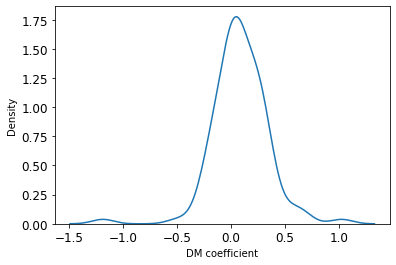

In [47]:
sns.kdeplot(de_coefs)
plt.xlabel('DM coefficient')

In [13]:
target_regulators = [x.split('.')[0] for x in significant_guides]

In [14]:
len(target_regulators)

46

In [15]:
len(significant_guides)

46

In [16]:
len(target_regulators)

46

In [23]:
results['PRDM1.106105284.GGACGCGTTCAAGTAAGCGT'].query('gene == "{}"'.format('PRDM1'))['de_coef'].iloc[0]

-0.4931821577467161

In [66]:
de_heatmap = pd.DataFrame(index=significant_guides, columns=target_regulators)

In [68]:
for guide in significant_guides:
    for gene in target_regulators:
        
        val = results[guide].query('gene == "{}"'.format(gene))
        if val.shape[0] > 0:
            de_heatmap.loc[guide, gene] = val['de_coef'].iloc[0]

### Compute coexpression

In [38]:
adata_wt = adata[adata.obs['WT'] == 'T'].copy().copy()

In [39]:
adata_wt.obs['group'] = 'A'

In [41]:
memento.create_groups(adata_wt, label_columns=['donor', 'group'])
memento.compute_1d_moments(adata_wt, gene_list=target_regulators)

In [44]:
filtered_regulators = list(set(target_regulators) & set(adata_wt.var.index))
memento.compute_2d_moments(adata_wt, list(itertools.combinations(filtered_regulators, 2)))


In [46]:
moments = memento.get_2d_moments(adata_wt, groupby='group')

In [48]:
gxg_matrix = pd.DataFrame(index=filtered_regulators, columns=filtered_regulators)
for idx, row in moments.iterrows():
    gxg_matrix.loc[row['gene_1'], row['gene_2']] = row['group_A']
    gxg_matrix.loc[row['gene_2'], row['gene_1']] = row['group_A']

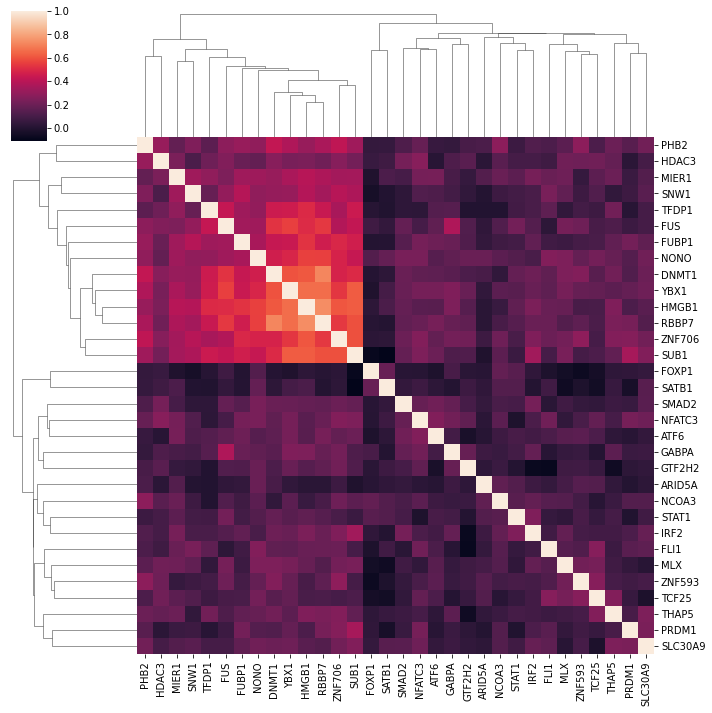

In [55]:
cg = sns.clustermap(gxg_matrix.fillna(1.0))
order = gxg_matrix.index[cg.dendrogram_col.reordered_ind]

In [72]:
de_heatmap.index = [x.split('.')[0] for x in de_heatmap.index]

In [85]:
de_heatmap = de_heatmap.loc[order, order].fillna(0.0)
de_heatmap=(de_heatmap-de_heatmap.mean())/de_heatmap.std()

In [93]:
order

Index(['PHB2', 'HDAC3', 'MIER1', 'SNW1', 'TFDP1', 'FUS', 'FUBP1', 'NONO',
       'DNMT1', 'YBX1', 'HMGB1', 'RBBP7', 'ZNF706', 'SUB1', 'FOXP1', 'SATB1',
       'SMAD2', 'NFATC3', 'ATF6', 'GABPA', 'GTF2H2', 'ARID5A', 'NCOA3',
       'STAT1', 'IRF2', 'FLI1', 'MLX', 'ZNF593', 'TCF25', 'THAP5', 'PRDM1',
       'SLC30A9'],
      dtype='object')

Text(33.0, 0.5, 'guides')

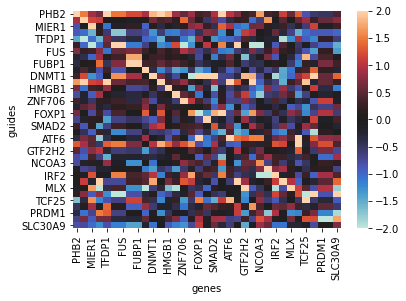

In [92]:
sns.heatmap(de_heatmap, center=0, vmax=2, vmin=-2)
plt.xlabel('genes'); plt.ylabel('guides')

### check the coexpression of DE genes

### Coexpression

In [70]:
ht_1d = memento.get_1d_ht_result(adata_ko)

In [71]:
ht_1d['fdr'] = memento.util._fdrcorrect(ht_1d['de_pval'])

In [85]:
gene_list = ht_1d.query('de_coef < -0.25 & fdr < 0.05').gene.tolist()
print(len(gene_list))

160


In [87]:
def get_gxg_matrix(adata, genes):

    memento.compute_2d_moments(adata, list(itertools.combinations(genes, 2)))
    
    moments = memento.get_2d_moments(adata, groupby='ko_indicator')
    
    gxg_matrix1 = pd.DataFrame(index=genes, columns=genes)
    gxg_matrix2 = pd.DataFrame(index=genes, columns=genes)
    for idx, row in moments.iterrows():
        gxg_matrix1.loc[row['gene_1'], row['gene_2']] = row['ko_indicator_0']
        gxg_matrix1.loc[row['gene_2'], row['gene_1']] = row['ko_indicator_0']
        gxg_matrix2.loc[row['gene_2'], row['gene_1']] = row['ko_indicator_1']
        gxg_matrix2.loc[row['gene_1'], row['gene_2']] = row['ko_indicator_1']
    gxg_matrix1 = gxg_matrix1.fillna(0.0)
    gxg_matrix2 = gxg_matrix2.fillna(0.0)

    gxg_matrix1 = gxg_matrix1.loc[list(set(gxg_matrix1.columns) & set(gxg_matrix1.index)), list(set(gxg_matrix1.columns) & set(gxg_matrix1.index))]
    gxg_matrix2 = gxg_matrix2.loc[list(set(gxg_matrix2.columns) & set(gxg_matrix2.index)), list(set(gxg_matrix2.columns) & set(gxg_matrix2.index))]

    
    return gxg_matrix1, gxg_matrix2

In [88]:
gxg_wt, gxg_ko = get_gxg_matrix(adata_ko, gene_list)

### Do some clustering

In [91]:
from sklearn.cluster import AgglomerativeClustering

In [92]:
# num_cluster = 4

In [96]:
# working params: distance_threshold=15
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=3).fit(gxg_ko.clip(upper=1, lower=-1))
# keep cluster 3
for cluster in range(clustering.labels_.max()+1):
    selector = np.where(clustering.labels_==cluster)[0]
    selected_wt_gxg = gxg_wt.iloc[selector, selector]
    selected_ko_gxg = gxg_ko.iloc[selector, selector]

    print(cluster, selector.shape[0], selected_wt_gxg.mean().mean(), selected_ko_gxg.mean().mean())


0 22 0.35114276605767686 0.3351884399181215
1 25 0.6646390757419885 0.6531175296249565
2 19 0.4352688742758484 0.4198738248826675
3 18 0.14469990866609525 0.12169217135693715
4 8 0.4447337622092413 0.42588287648069817
5 17 0.6843958396228873 0.6852536077041708
6 14 0.2095113725261463 0.19121378672009978
7 6 0.40422253790445306 0.37830538143306874
8 3 0.04845695078121714 0.04294191583868412
9 15 0.7354642672036179 0.737486902992141
10 5 0.5420289024520384 0.5190746868672514
11 3 0.5503424703089784 0.5576070370863695
12 5 0.5292480571893143 0.5274590076841549


In [99]:
group1_genes = gxg_wt.index[clustering.labels_==5].tolist() #+ ctrl_gxg.index[clustering.labels_==10].tolist()

In [104]:
gxg_ko.head(5)

EXOSC8     TOMM5  KIAA0101     MYO5A    ARPC5L     SSRP1  \
EXOSC8    0.000000  0.531067  0.689032  0.157063  0.338759  0.593300   
TOMM5     0.531067  0.000000  0.515224  0.199439  0.326219  0.555631   
KIAA0101  0.689032  0.515224  0.000000  0.065784  0.302372  0.579867   
MYO5A     0.157063  0.199439  0.065784  0.000000  0.263077  0.145969   
ARPC5L    0.338759  0.326219  0.302372  0.263077  0.000000  0.553235   

            HMGXB4      SMC6     CENPU      TFRC  ...      TYMS    RAB33A  \
EXOSC8    0.415673  0.443304  0.685607  0.408434  ...  0.591501  0.153221   
TOMM5     0.376650  0.339473  0.546790  0.452212  ...  0.411249  0.228334   
KIAA0101  0.519901  0.462273  0.811413  0.345934  ...  0.750060  0.217485   
MYO5A     0.178378  0.167428  0.118909  0.156918  ...  0.127222  0.147905   
ARPC5L    0.325577  0.354831  0.368881  0.363870  ...  0.446919  0.291118   

              SMC2     RBM17       DUT     CASC5     DNMT1     DTYMK  \
EXOSC8    0.716295  0.369546  0.483641  0.534667  0.589726  0.624957   
TOMM5     0.470531  0.362946  0.352819  0.326116  0.446615  0.488756   
KIAA0101  0.827505  0.378614  0.597020  0.657038  0.670340  0.708473   
MYO5A     0.149654  0.191947  0.134511  0.101677  0.175374  0.145741   
ARPC5L    0.372826  0.609454  0.604492  0.243443  0.503090  0.548175   

             PTPN7    RANBP1  
EXOSC8    0.377118  0.441683  
TOMM5     0.493400  0.375663  
KIAA0101  0.348740  0.444628  
MYO5A     0.253661  0.109840  
ARPC5L    0.340952  0.727122  

[5 rows x 160 columns]

In [105]:
gxg_wt.head(5)

EXOSC8     TOMM5  KIAA0101     MYO5A    ARPC5L     SSRP1  \
EXOSC8    0.000000  0.560001  0.689100  0.147547  0.381736  0.635051   
TOMM5     0.560001  0.000000  0.523478  0.213157  0.382136  0.613559   
KIAA0101  0.689100  0.523478  0.000000  0.060592  0.320855  0.604009   
MYO5A     0.147547  0.213157  0.060592  0.000000  0.261744  0.124209   
ARPC5L    0.381736  0.382136  0.320855  0.261744  0.000000  0.562430   

            HMGXB4      SMC6     CENPU      TFRC  ...      TYMS    RAB33A  \
EXOSC8    0.449761  0.431515  0.710510  0.421776  ...  0.560272  0.226410   
TOMM5     0.435154  0.415920  0.606372  0.443848  ...  0.461335  0.235360   
KIAA0101  0.518136  0.479928  0.852328  0.340105  ...  0.758110  0.280924   
MYO5A     0.168894  0.137055  0.096694  0.220990  ...  0.136775  0.121510   
ARPC5L    0.338414  0.360430  0.416498  0.443563  ...  0.448710  0.325546   

              SMC2     RBM17       DUT     CASC5     DNMT1     DTYMK  \
EXOSC8    0.730534  0.417049  0.521200  0.563094  0.548562  0.639652   
TOMM5     0.517955  0.395060  0.400204  0.395954  0.477245  0.563159   
KIAA0101  0.835705  0.431422  0.601780  0.672992  0.686883  0.741815   
MYO5A     0.103727  0.161811  0.126993  0.115574  0.180131  0.168308   
ARPC5L    0.374398  0.629153  0.598252  0.229111  0.491274  0.559313   

             PTPN7    RANBP1  
EXOSC8    0.429340  0.455597  
TOMM5     0.533111  0.412572  
KIAA0101  0.380215  0.445800  
MYO5A     0.220502  0.104216  
ARPC5L    0.405338  0.785470  

[5 rows x 160 columns]

<AxesSubplot:>

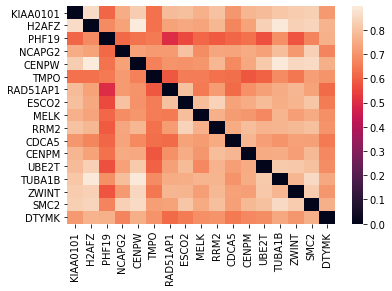

In [100]:
sns.heatmap(gxg_ko.loc[group1_genes, group1_genes])

<AxesSubplot:>

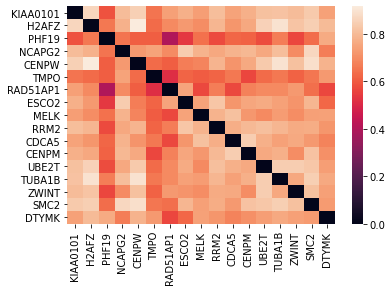

In [101]:
sns.heatmap(gxg_wt.loc[group1_genes, group1_genes])

### KO genes

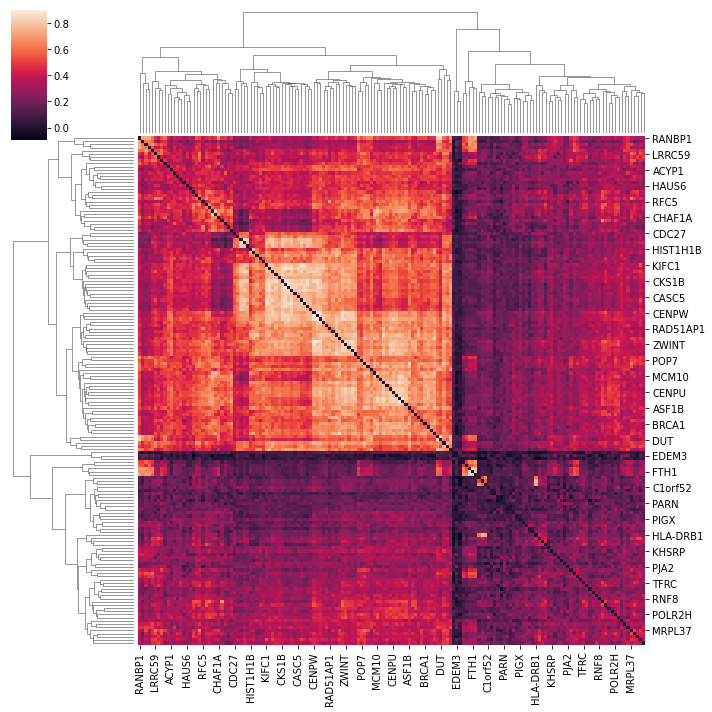

In [90]:
sns.clustermap(gxg_ko)

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


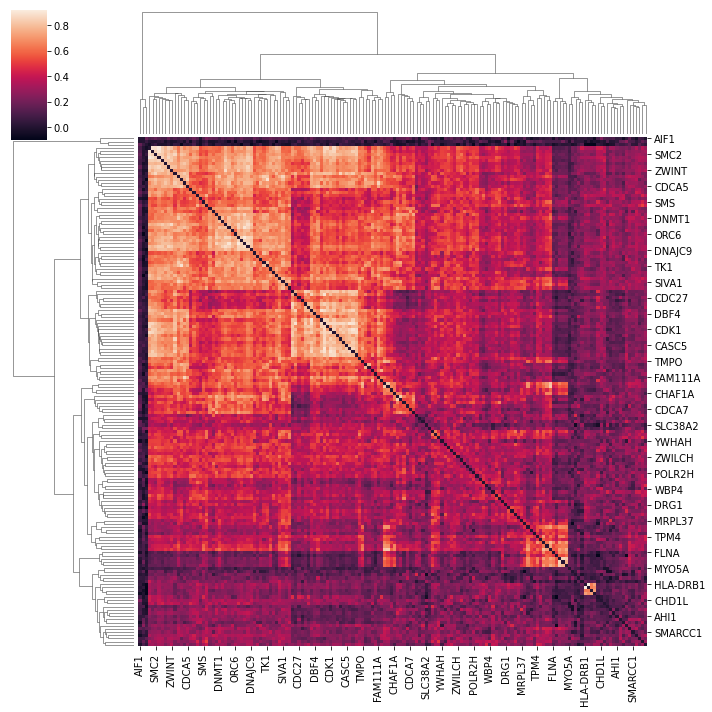

In [89]:
sns.clustermap(gxg_wt)

### For each group, compare the KO gene with the downstream genes

In [23]:
test_guides = ['WT', 'FUBP1.77964146', 'ZNF706.101201657']
adata = adata[adata.obs.group.isin(test_guides)]

In [24]:
adata.shape

(10466, 562)

In [25]:
estimator = scme.SingleCellEstimator(
    adata=adata, 
    group_label='group',
    n_umis_column='n_counts',
    num_permute=10000,
    beta=0.1)

In [26]:
estimator.estimate_beta_sq(tolerance=3)

Computing observed moments for: ZNF706.101201657
Computing observed moments for: WT
Computing observed moments for: FUBP1.77964146


/wynton/group/ye/mincheol/Github/scrna-parameter-estimation/simplesc/scme.py:245: RuntimeWarning: invalid value encountered in true_divide
  (y/x**2 - 1/x)[y > x],
/wynton/group/ye/mincheol/Github/scrna-parameter-estimation/simplesc/scme.py:245: RuntimeWarning: divide by zero encountered in true_divide
  (y/x**2 - 1/x)[y > x],
/wynton/group/ye/mincheol/Github/scrna-parameter-estimation/simplesc/scme.py:250: RuntimeWarning: invalid value encountered in true_divide
  self.all_group_obs_cv_sq = y/x**2


In [28]:
%matplotlib inline

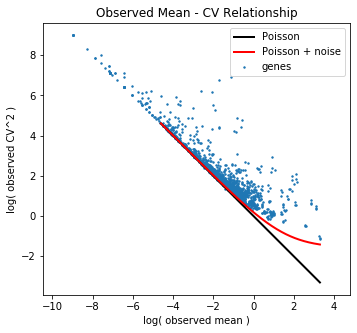

In [29]:
estimator.plot_cv_mean_curve()

In [ ]:
for group in adata.groups.drop_duplicates()[:2]:
    group

In [22]:
['WT', 'FUBP1.77964146', 'ZNF706.101201657', 'RFX2.6026185', 'VDR.47855738']

['WT', 'FUBP1.77964146', 'ZNF706.101201657', 'RFX2.6026185', 'VDR.47855738']

In [21]:
adata.obs.group.value_counts().index[:5]

CategoricalIndex(['WT', 'FUBP1.77964146', 'ZNF706.101201657', 'RFX2.6026185',
                  'VDR.47855738'],
                 categories=['ARID5A.96550280', 'ARID5A.96551631', 'ARID5B.61902410', 'ARID5B.62050979', 'ASCC1.72196949', 'ASCC1.72210803', 'ATF3.212615059', 'ATF3.212615192', ...], ordered=False, dtype='category')

In [11]:
adata.obs.head(5)

concat_index     donor multiplet  well  \
index                                                        
CTTTGCGGTCAACATC-8   0            IGTB1982  SNG       8      
TGGCGCAAGGATGCGT-6   0            IGTB1762  SNG       6      
CGAGCACGTAGAGCTG-7   0            IGTB2065  SNG       7      
TGCCCATAGAGTGACC-10  0            IGTB1762  SNG       10     
TGGACGCAGAACAATC-7   0            IGTB884   SNG       7      

                                                guide1_cov guide2_cov  \
index                                                                   
CTTTGCGGTCAACATC-8   RC3H1.173961818.CTGGATTCTGGTACATACGA   nan         
TGGCGCAAGGATGCGT-6   MAFK.1540041.CCTGCGGGGTCTCACCAAGG      nan         
CGAGCACGTAGAGCTG-7   SRA1.140551987.AGACTGCCGTGGCCACACAA    nan         
TGCCCATAGAGTGACC-10  ZNF706.101201657.GAAACAAGGACATGACCAAA  nan         
TGGACGCAGAACAATC-7   TFB2M.246556688.GTTGGAATGTTCCCAAGTAG   nan         

                    guide3_cov guide4_cov  guide1_ce_cov  guide2_ce_cov  \
index                                                                     
CTTTGCGGTCAACATC-8   nan        nan        0.154435      NaN              
TGGCGCAAGGATGCGT-6   nan        nan        0.005697      NaN              
CGAGCACGTAGAGCTG-7   nan        nan        0.109404      NaN              
TGCCCATAGAGTGACC-10  nan        nan        0.146234      NaN              
TGGACGCAGAACAATC-7   nan        nan        0.119784      NaN              

                     guide3_ce_cov  guide4_ce_cov  guide_multiplet_cov  \
index                                                                    
CTTTGCGGTCAACATC-8  NaN            NaN             1                     
TGGCGCAAGGATGCGT-6  NaN            NaN             1                     
CGAGCACGTAGAGCTG-7  NaN            NaN             1                     
TGCCCATAGAGTGACC-10 NaN            NaN             1                     
TGGACGCAGAACAATC-7  NaN            NaN             1                     

                                group  n_counts  
index                                            
CTTTGCGGTCAACATC-8   RC3H1.173961818   3027      
TGGCGCAAGGATGCGT-6   MAFK.1540041      6495      
CGAGCACGTAGAGCTG-7   SRA1.140551987    4386      
TGCCCATAGAGTGACC-10  ZNF706.101201657  5517      
TGGACGCAGAACAATC-7   TFB2M.246556688   7523

### Select relevant cells and save the AnnData object

In [3]:
adata = sc.read('/wynton/group/ye/rgate/072319_tfko_140_seq/tfko.sng.guides.h5ad')

Only considering the two last: ['.guides', '.h5ad'].
Only considering the two last: ['.guides', '.h5ad'].


In [30]:
df = pd.read_csv(
    '/wynton/group/ye/rgate/072319_tfko_140_seq/tfko.sng.guides.combat.n50.res1.meta.txt', 
    sep='\t',
    index_col=0)

In [31]:
df_singlet = df.query('guide_multiplet_cov == "1"').copy()

In [32]:
df_singlet['group'] = df_singlet.apply(lambda row: '.'.join(row['guide1_cov'].split('.')[:-1]) if row['WT'] == 'F' else 'WT', axis=1)

In [34]:
adata_singlets = adata[df_singlet.index].copy()
adata_singlets.obs['group'] = df_singlet['group']

In [47]:
ko_genes = list(set([x.split('.')[0] for x in adata_singlets.obs.guide1_cov.drop_duplicates().tolist()]))

In [42]:
genes = list(set(ko_genes) | set(immune_genes))

In [43]:
adata_singlets = adata_singlets[:, genes].copy()

In [44]:
adata_singlets.shape

(105203, 562)

In [53]:
sc.write(data_path + 'cd4_cropseq_data/guide_singlets.h5ad', adata_singlets)

... storing 'group' as categorical


### Get a list of genes to test correlations against

In [57]:
prefixes = ['STAT', 'IRF', 'IFI', 'ETS', 'NCOA', 'JUN', 'BATF', 'SATB1', 'FOXP']
genes_to_test = []
for gene in ko_genes:
    for prefix in prefixes:
        if prefix in gene:
            genes_to_test.append(gene)

In [59]:
with open(data_path + 'cd4_cropseq_data/genes_to_test.pkl', 'wb') as f:
    pkl.dump(genes_to_test, f)